<a href="https://colab.research.google.com/github/OMEAkin/ML_with_TF_Opencampus_SH/blob/main/week_4/Wk4_CNN_Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rock - Paper - Scissor: Multi-class classification

# Task 1

Download the Rock-Paper-Scissors dataset from kaggle.com.
https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

# Task 2

Place the `rock-paper-scissors` folder in your Colab-Environment. (On the same level as this notebook.)

```
|
|-- rock-paper-scissors
|   |-- rock
|   |-- paper
|   `-- scissors
`-- Assignment_CNN-Part-2.ipynb
```

# Task 3

Set up a data generator and use it to build a training and a test dataset. Assign 20% of the data to your test dataset. This can be done by using the `flow_from_directory` function of the data generator.  Checkout the documentation for details:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Tips:
- Make sure to rescale the pixel values.
- Make sure the dataset is set up for multi-class classification.

# Task 4

Build a model and train it. Your goal is to reach an validation accuracy of at least 90%.
Try different model architectures, batch sizes, learning-rates and data augmentation techniques. Your only constraint is to train the model for just 3 epochs!

Don't worry, if you fail to reach the 90% threshold. ;)

Tips:
- Ensure your model output propability scores for each class. (softmax)
- Confirm you are using a loss function suitable for multi class classification.
-

##1. IMPORT DATASET AND LOAD LIBRARIES

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
#upload kaggle.json downloaded from Kaggle account
from google.colab import files
files.upload()

!rm -r ~/.kaggle                          #remove any old kaggle directory
!mkdir ~/.kaggle                          #make new kaggle directory
!mv ./kaggle.json ~/.kaggle/              #move kaggle.json file to new kaggle directory
!chmod 600 ~/.kaggle/kaggle.json          # ???

Saving kaggle.json to kaggle.json


In [ ]:
#copy API command od kaggle dataset
!kaggle datasets download -d drgfreeman/rockpaperscissors

rockpaperscissors.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('rockpaperscissors.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

##2. SET UP DIRECTORY, VISUALIZE DATA

In [ ]:
#define directories
import os

datadir = '/content/rps-cv-images'
rock_dir = '/content/rps-cv-images/paper'
paper_dir = '/content/rps-cv-images/rock'
scissors_dir = '/content/rps-cv-images/scissors'

In [ ]:
#check number of images in each directory
print(f'Number of Rock Images:', len(os.listdir(rock_dir)))
print(f'Number of Paper Images:', len(os.listdir(paper_dir)))
print(f'Number of Scissors Images:', len(os.listdir(scissors_dir)))

Number of Rock Images: 712
Number of Paper Images: 726
Number of Scissors Images: 750


In [ ]:
#images for ...


##3. BUILD GENERATORS FOR TRAINING AND TESTING SET

In [ ]:
BATCH_SIZE = 64
IMAGE_HEIGHT = 200
IMAGE_WIDTH = 300

In [ ]:
# Set up the data generator and the train and test sets
# Start code here ==>

train_images = train_images = tf.keras.utils.image_dataset_from_directory(
    datadir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

test_images = tf.keras.utils.image_dataset_from_directory(
    datadir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE)

# End code here <==

# Expected output: (Your numbers of images might be different.)
# Found 1751 images belonging to 3 classes.
# Found 437 images belonging to 3 classes.

Found 2188 files belonging to 3 classes.
Using 1751 files for training.
Found 2188 files belonging to 3 classes.
Using 437 files for validation.


##4. DATA PREPROCESSING

In [ ]:
# data normalization and resizing
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_HEIGHT, IMAGE_WIDTH),
    tf.keras.layers.Rescaling(1./255)
])

In [ ]:
# data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(height_factor=(0.2,0.3),
    width_factor=None,
    fill_mode='wrap')
])

##5. MODEL BUILDING AND COMPLIATION + DEFINING CALLBACK

In [ ]:
# Build the model
# Start code here ==>

#baseline model
def base_model():
    model = tf.keras.Sequential([
        resize_and_rescale,
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax") #multiclass classification w/ 3 classes
    ])
    return model

#model with augmentation but an extra convolution and maxpooling layer
def model1():
    model = tf.keras.Sequential([
        resize_and_rescale,
        data_augmentation,
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])
    return model

# End code here <==

In [ ]:
# Compile the model and fit it
# Start code here ==>
model = base_model()
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# End code here <==

In [ ]:
#model.summary()

In [ ]:
# Define callback
class AccuracyCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy')> 0.90):
          print("\nReached 90% accuracy so training is cancelled")
          self.model.stop_training = True

accuracy_callback = AccuracyCallback()

##6. FIT & EVALUATE MODEL

In [ ]:
# Fit model

history = model.fit(train_images, validation_data=test_images,
                    epochs=10, callbacks=[accuracy_callback] )

Epoch 1/10
28/28 [==============================] - 155s 5s/step - loss: 13.5140 - accuracy: 0.4820 - val_loss: 0.7872 - val_accuracy: 0.7071
Epoch 2/10
28/28 [==============================] - 127s 4s/step - loss: 0.5839 - accuracy: 0.8104 - val_loss: 0.4317 - val_accuracy: 0.8375
Epoch 3/10
28/28 [==============================] - 120s 4s/step - loss: 0.3866 - accuracy: 0.8829 - val_loss: 0.3101 - val_accuracy: 0.9085
Epoch 4/10
28/28 [==============================] - ETA: 0s - loss: 0.2676 - accuracy: 0.9269
Reached 90% accuracy so training is cancelled
28/28 [==============================] - 119s 4s/step - loss: 0.2676 - accuracy: 0.9269 - val_loss: 0.2659 - val_accuracy: 0.9176


In [ ]:
#no test set
#test_loss, test_accuracy = model.evaluate(test_images, test_labels)
#print(f"Test accuracy: {test_accuracy*100:.2f}%")

##7. VISUALIZATION OF MODEL ACCURACY

7/7 - 13s - loss: 0.2659 - accuracy: 0.9176 - 13s/epoch - 2s/step


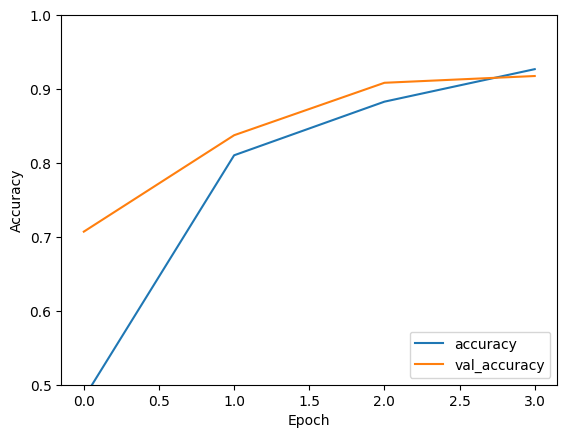

In [ ]:
#visulaization of accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, verbose=2)